In [ ]:
pip install -U scikit-learn

In [ ]:
import os
os.chdir("/content/drive/My Drive/Analytic-Steps-blogs/YouTube/Sentiment/fourth_blog/")

In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import scipy


import warnings
warnings.filterwarnings("ignore")


In [ ]:
from textblob import TextBlob
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
ls

Dataset.csv  sample_data/


In [ ]:
data = pd.read_csv("Dataset.csv")

In [ ]:
data.head()

,Video ID,Comment ID,comments
0,MwpMEbgC7DA,UgwUJGD9twrbc2p5HsF4AaABAg,Who else just randomly remembered this s...
1,MwpMEbgC7DA,UgwatJec2ipyRetMjPJ4AaABAg,still can't realize its going to be 9th...
2,MwpMEbgC7DA,UgwUv2-t5p8tboW69vB4AaABAg,It's October 2021 Let's See how many ...
3,MwpMEbgC7DA,UgxAIow1Xkh884IL9V94AaABAg,Timeless classic 3
4,MwpMEbgC7DA,UgydlW8DryB7MgHl_5p4AaABAg,This song will never be forgotten Will...


In [ ]:
data.shape

(1067, 3)

In [ ]:
data['polarity'] = data['comments'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
data.head()

,Video ID,Comment ID,comments,polarity
0,MwpMEbgC7DA,UgwUJGD9twrbc2p5HsF4AaABAg,Who else just randomly remembered this s...,-0.500000
1,MwpMEbgC7DA,UgwatJec2ipyRetMjPJ4AaABAg,still can't realize its going to be 9th...,0.600000
2,MwpMEbgC7DA,UgwUv2-t5p8tboW69vB4AaABAg,It's October 2021 Let's See how many ...,0.500000
3,MwpMEbgC7DA,UgxAIow1Xkh884IL9V94AaABAg,Timeless classic 3,0.166667
4,MwpMEbgC7DA,UgydlW8DryB7MgHl_5p4AaABAg,This song will never be forgotten Will...,0.166667


## Shuffle the dataset

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)

In [ ]:
data['pol_cat']  = 0

Continuous to categorical

In [ ]:
# data['pol_cat'][data.polarity == 0] = 0
data['pol_cat'][data.polarity > 0] = 1
data['pol_cat'][data.polarity <= 0] = -1


In [ ]:
data.head()

,Video ID,Comment ID,comments,polarity,pol_cat
0,MwpMEbgC7DA,UgxRaaXSvOnxOpx2XBZ4AaABAg,why have i just realised just now tha...,0.600000,1
1,MwpMEbgC7DA,UgwJ8rCuePPDV8yKzs14AaABAg,This is my comfort song it makes me ...,0.200000,1
2,MwpMEbgC7DA,UgydlW8DryB7MgHl_5p4AaABAg,This song will never be forgotten Will...,0.166667,1
3,MwpMEbgC7DA,UgyBWzS2Kg_xBe0oGgJ4AaABAg,I came here after vampire diaries season 6,0.000000,-1
4,MwpMEbgC7DA,UgxIQvlfp3yXOEGCXn54AaABAg,I was here in 2021 and i will be here...,0.000000,-1


In [ ]:
data['pol_cat'].value_counts()

-1    565
 1    502
Name: pol_cat, dtype: int64

Create separate dataframes for Negative,Positive & Neutral comments 

In [ ]:
data_pos = data[data['pol_cat'] == 1]
data_pos = data_pos.reset_index(drop = True)

data_neg = data[data['pol_cat'] == -1]
data_neg = data_neg.reset_index(drop = True)

# data_neutral = data[data['pol_cat'] == 0]
# data_neutral = data_neutral.reset_index(drop = True)

In [ ]:
data_pos.head()

,Video ID,Comment ID,comments,polarity,pol_cat
0,MwpMEbgC7DA,UgxRaaXSvOnxOpx2XBZ4AaABAg,why have i just realised just now tha...,0.600000,1
1,MwpMEbgC7DA,UgwJ8rCuePPDV8yKzs14AaABAg,This is my comfort song it makes me ...,0.200000,1
2,MwpMEbgC7DA,UgydlW8DryB7MgHl_5p4AaABAg,This song will never be forgotten Will...,0.166667,1
3,MwpMEbgC7DA,Ugjo13NqRq4553gCoAEC,I wanna take you somewhere so you know ...,0.356897,1
4,MwpMEbgC7DA,UgzR2lWAvrfjYlbfEoB4AaABAg,I wanna take you somewhere so you know ...,0.356897,1


In [ ]:
data_pos.shape

(502, 5)

In [ ]:
data_neg.head()

,Video ID,Comment ID,comments,polarity,pol_cat
0,MwpMEbgC7DA,UgyBWzS2Kg_xBe0oGgJ4AaABAg,I came here after vampire diaries season 6,0.000000,-1
1,MwpMEbgC7DA,UgxIQvlfp3yXOEGCXn54AaABAg,I was here in 2021 and i will be here...,0.000000,-1
2,MwpMEbgC7DA,UgxdTG3rJbqJRfUs1at4AaABAg,Pov you're 9 years later,0.000000,-1
3,MwpMEbgC7DA,Ugw6lEn_5ReUJX506614AaABAg,Let s see how muny people are listening...,0.000000,-1
4,MwpMEbgC7DA,UgzwkrWpL3FPed-l0qF4AaABAg,Its so hard to not cry while listening ...,-0.291667,-1


In [ ]:
data_neg['comments'][40]

'Legends  watch    this  in  2030'

-1    565
 1    502
Name: pol_cat, dtype: int64

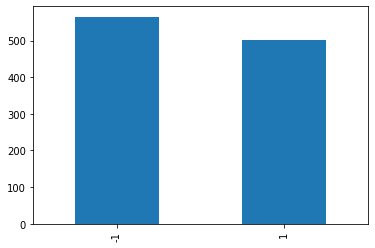

In [ ]:
data.pol_cat.value_counts().plot.bar()
data.pol_cat.value_counts()

## Data Preprocessing

Lower the text in comments

In [ ]:
data['comments'] = data['comments'].str.lower()

In [ ]:
data['comments'].head()

0    why    have  i  just  realised  just  now  tha...
1    this  is  my  comfort  song    it  makes  me  ...
2    this  song  will  never  be  forgotten    will...
3    i  came  here  after  vampire  diaries  season  6
4    i  was  here  in  2021  and  i  will  be  here...
Name: comments, dtype: object

In [ ]:
data.describe()

,polarity,pol_cat
count,1067.000000,1067.000000
mean,0.162778,-0.059044
std,0.327622,0.998723
min,-1.000000,-1.000000
25%,0.000000,-1.000000
50%,0.000000,-1.000000
75%,0.361667,1.000000
max,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Video ID    1067 non-null   object 
 1   Comment ID  1067 non-null   object 
 2   comments    1067 non-null   object 
 3   polarity    1067 non-null   float64
 4   pol_cat     1067 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 41.8+ KB


In [ ]:
data['comments'][0]

'why    have  i  just  realised  just  now  that  he  has  a  karen  cut  lmao'

In [ ]:
data['comments'][0].strip()

'why    have  i  just  realised  just  now  that  he  has  a  karen  cut  lmao'

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import re
import nltk

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
data['comments'] = data['comments'].str.strip()

In [ ]:
train = data.copy()

In [ ]:
train['comments'] = train['comments'].str.strip()

In [ ]:
train['comments'][0]

'why    have  i  just  realised  just  now  that  he  has  a  karen  cut  lmao'

In [ ]:
def remove_stopwords(line):
    word_tokens = word_tokenize(line)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)

In [ ]:
data['stop_comments'] = data['comments'].apply(lambda x : remove_stopwords(x))

In [ ]:
data.head()

,Video ID,Comment ID,comments,polarity,pol_cat,stop_comments
0,MwpMEbgC7DA,UgxRaaXSvOnxOpx2XBZ4AaABAg,why have i just realised just now tha...,0.600000,1,realised karen cut lmao
1,MwpMEbgC7DA,UgwJ8rCuePPDV8yKzs14AaABAg,this is my comfort song it makes me ...,0.200000,1,comfort song makes feel every emotion need fee...
2,MwpMEbgC7DA,UgydlW8DryB7MgHl_5p4AaABAg,this song will never be forgotten will...,0.166667,1,song never forgotten pass generations classic ...
3,MwpMEbgC7DA,UgyBWzS2Kg_xBe0oGgJ4AaABAg,i came here after vampire diaries season 6,0.000000,-1,came vampire diaries season 6
4,MwpMEbgC7DA,UgxIQvlfp3yXOEGCXn54AaABAg,i was here in 2021 and i will be here...,0.000000,-1,2021 2022 2023 2024 die


In [ ]:
data.to_csv('Dataset-with-sentiments.csv')